In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import warnings
#아래 두개 해줘야 한글이 안 깨진다
matplotlib.rcParams['font.family']='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False
warnings.simplefilter('ignore')

In [19]:
df = pd.read_csv('CCTV_in_Seoul.csv', encoding='utf-8', index_col='기관명')  
df

소계  2013년도 이전  2014년  2015년  2016년
기관명                                       
강남구   2780       1292    430    584    932
강동구    773        379     99    155    377
강북구    748        369    120    138    204
강서구    884        388    258    184     81
관악구   1496        846    260    390    613
광진구    707        573     78     53    174
구로구   1561       1142    173    246    323
금천구   1015        674     51    269    354
노원구   1265        542     57    451    516
도봉구    485        238    159     42    386
동대문구  1294       1070     23    198    579
동작구   1091        544    341    103    314
마포구    574        314    118    169    379
서대문구   962        844     50     68    292
서초구   1930       1406    157    336    398
성동구   1062        730     91    241    265
성북구   1464       1009     78    360    204
송파구    618        529     21     68    463
양천구   2034       1843    142     30    467
영등포구   904        495    214    195    373
용산구   1624       1368    218    112    398
은평구   1873       1138    224    278    468
종로구   1002        464    314    211    630
중구     671        413    190     72    348
중랑구    660        509    121    177    109

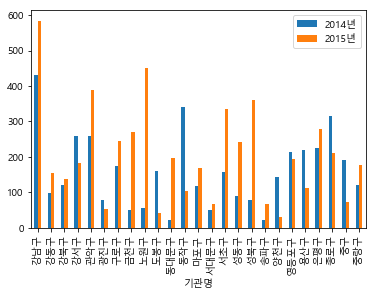

In [9]:
# 1. 2014년, 15년에 대한 바차트를 그리시오
df[['2014년', '2015년']].plot(kind='bar')
plt.show()

In [10]:
# 2. cctv 소계가 가장 많은 top5 기관명(2014년 기준)
df.sort_values(by='소계', ascending=False)[:5]

소계  2013년도 이전  2014년  2015년  2016년
기관명                                      
강남구  2780       1292    430    584    932
양천구  2034       1843    142     30    467
서초구  1930       1406    157    336    398
은평구  1873       1138    224    278    468
용산구  1624       1368    218    112    398

In [66]:
#3.최근 2년동안 cctv 증가율을 구하시오

# 2015년 대비 2016년 cctv 증가율 구하기
df['최근증가율'] = round(((df['2016년']-df['2015년'])/df['2016년'])*100, 2) # 소수점 2자리 까지

# df['증가율'] = round(df['증가율'], 2)
df[['2015년','2016년', '최근증가율']]

2015년  2016년   최근증가율
기관명                       
강남구     584    932   37.34
강동구     155    377   58.89
강북구     138    204   32.35
강서구     184     81 -127.16
관악구     390    613   36.38
광진구      53    174   69.54
구로구     246    323   23.84
금천구     269    354   24.01
노원구     451    516   12.60
도봉구      42    386   89.12
동대문구    198    579   65.80
동작구     103    314   67.20
마포구     169    379   55.41
서대문구     68    292   76.71
서초구     336    398   15.58
성동구     241    265    9.06
성북구     360    204  -76.47
송파구      68    463   85.31
양천구      30    467   93.58
영등포구    195    373   47.72
용산구     112    398   71.86
은평구     278    468   40.60
종로구     211    630   66.51
중구       72    348   79.31
중랑구     177    109  -62.39

In [51]:
# 2015년 대비 2016년도 가장 CCTV가 가장 많이 설치된 지역 10곳을 보여라
df.sort_values(by='최근증가율', ascending=False)[:10][['2016년','최근증가율']]

2016년     최근증가율
기관명                  
강남구     932  93137.34
종로구     630  62966.51
관악구     613  61236.38
동대문구    579  57865.80
노원구     516  51512.60
은평구     468  46740.60
양천구     467  46693.58
송파구     463  46285.31
용산구     398  39771.86
서초구     398  39715.58

In [67]:
#4. cctv 소계 1000이상은 높음, 미만은 낮음으로 설치 정도 컬럼 추가하시오
df['설치 정도'] = df.apply(lambda v:'높음' if v[0]>=1000 else '낮음', axis=1)
df

소계  2013년도 이전  2014년  2015년  2016년       증가율 설치 정도   최근증가율 이전증가율
기관명                                                                     
강남구   2780       1292    430    584    932  93137.34    높음   37.34    낮음
강동구    773        379     99    155    377  37658.89    낮음   58.89    낮음
강북구    748        369    120    138    204  20332.35    낮음   32.35    낮음
강서구    884        388    258    184     81   7872.84    낮음 -127.16    낮음
관악구   1496        846    260    390    613  61236.38    높음   36.38    낮음
광진구    707        573     78     53    174  17369.54    낮음   69.54    낮음
구로구   1561       1142    173    246    323  32223.84    높음   23.84    낮음
금천구   1015        674     51    269    354  35324.01    높음   24.01    낮음
노원구   1265        542     57    451    516  51512.60    높음   12.60    낮음
도봉구    485        238    159     42    386  38589.12    낮음   89.12    급증
동대문구  1294       1070     23    198    579  57865.80    높음   65.80    낮음
동작구   1091        544    341    103    314  31367.20    높음   67.20    낮음
마포구    574        314    118    169    379  37855.41    낮음   55.41    급증
서대문구   962        844     50     68    292  29176.71    낮음   76.71    낮음
서초구   1930       1406    157    336    398  39715.58    높음   15.58    낮음
성동구   1062        730     91    241    265  26409.06    높음    9.06    낮음
성북구   1464       1009     78    360    204  20223.53    높음  -76.47    낮음
송파구    618        529     21     68    463  46285.31    낮음   85.31    낮음
양천구   2034       1843    142     30    467  46693.58    높음   93.58    낮음
영등포구   904        495    214    195    373  37247.72    낮음   47.72    낮음
용산구   1624       1368    218    112    398  39771.86    높음   71.86    낮음
은평구   1873       1138    224    278    468  46740.60    높음   40.60    낮음
종로구   1002        464    314    211    630  62966.51    높음   66.51    급증
중구     671        413    190     72    348  34779.31    낮음   79.31    낮음
중랑구    660        509    121    177    109  10737.61    낮음  -62.39    낮음

In [49]:
# 5. 2016년 cctv 수가 가장 높은 기관명의 2015년 cctv수, 2014년 cctv 수를 출력하시오
df[ df['2016년']== df['2016년'].max() ][['2015년','2014년']]

2015년  2014년
기관명              
강남구    584    430

In [64]:
# 6. 2013년도 이전과 2016년의 cctv 증가율 col을 생성
# 증가율이 1.2 이상이면 '급증', 1 이상이면 '보통', 그 외엔 '낮음' 컬럼 생성
def fn(v):
    if v>=1.2:
        return '급증'
    elif 1 <= v < 1.2:
        return '보통'
    else:
        return '낮음'
df['이전증가율'] = (df['2016년']/df['2013년도 이전'])
df['이전증가율'] = df['이전증가율'].apply(fn)
df


소계  2013년도 이전  2014년  2015년  2016년       증가율 설치 정도     최근증가율 이전증가율
기관명                                                                       
강남구   2780       1292    430    584    932  93137.34    높음  93137.34    낮음
강동구    773        379     99    155    377  37658.89    낮음  37658.89    낮음
강북구    748        369    120    138    204  20332.35    낮음  20332.35    낮음
강서구    884        388    258    184     81   7872.84    낮음   7872.84    낮음
관악구   1496        846    260    390    613  61236.38    높음  61236.38    낮음
광진구    707        573     78     53    174  17369.54    낮음  17369.54    낮음
구로구   1561       1142    173    246    323  32223.84    높음  32223.84    낮음
금천구   1015        674     51    269    354  35324.01    높음  35324.01    낮음
노원구   1265        542     57    451    516  51512.60    높음  51512.60    낮음
도봉구    485        238    159     42    386  38589.12    낮음  38589.12    급증
동대문구  1294       1070     23    198    579  57865.80    높음  57865.80    낮음
동작구   1091        544    341    103    314  31367.20    높음  31367.20    낮음
마포구    574        314    118    169    379  37855.41    낮음  37855.41    급증
서대문구   962        844     50     68    292  29176.71    낮음  29176.71    낮음
서초구   1930       1406    157    336    398  39715.58    높음  39715.58    낮음
성동구   1062        730     91    241    265  26409.06    높음  26409.06    낮음
성북구   1464       1009     78    360    204  20223.53    높음  20223.53    낮음
송파구    618        529     21     68    463  46285.31    낮음  46285.31    낮음
양천구   2034       1843    142     30    467  46693.58    높음  46693.58    낮음
영등포구   904        495    214    195    373  37247.72    낮음  37247.72    낮음
용산구   1624       1368    218    112    398  39771.86    높음  39771.86    낮음
은평구   1873       1138    224    278    468  46740.60    높음  46740.60    낮음
종로구   1002        464    314    211    630  62966.51    높음  62966.51    급증
중구     671        413    190     72    348  34779.31    낮음  34779.31    낮음
중랑구    660        509    121    177    109  10737.61    낮음  10737.61    낮음